# **Occupancy Detection - by Arya Adhy**

![banner](https://raw.githubusercontent.com/aryaadhy/Occupancy_Detection_FINPRO/main/assets/banner.png)

## **Data Preparation**

### **Import Libraries**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

### **Read Datasets**

In [2]:
datatest_1 = pd.read_csv("https://raw.githubusercontent.com/aryaadhy/Occupancy_Detection_FINPRO/main/dataset/datatest.csv")
datatest_2 = pd.read_csv("https://raw.githubusercontent.com/aryaadhy/Occupancy_Detection_FINPRO/main/dataset/datatest2.csv")
datatraining = pd.read_csv("https://raw.githubusercontent.com/aryaadhy/Occupancy_Detection_FINPRO/main/dataset/datatraining.csv")

### **Data Cleaning**

In [3]:
# Duplicate, missing values, and data types summary function
def missing_values_summary(df, name):
    print(f'Duplicate values {name}:', df.duplicated().sum())
    msv = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
    msv['Percentage'] = (msv['Total Null Values']/df.shape[0])*100
    msv["Data Type"] = [df[col].dtype for col in df.columns]
    msv.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
    return msv.style.background_gradient(cmap='Blues')

In [4]:
missing_values_summary(datatest_1, "datatest_1")

Duplicate values datatest_1: 2


,Total Null Values,Percentage,Data Type
date,0,0.000000,object
Temperature,0,0.000000,float64
Humidity,0,0.000000,float64
Light,0,0.000000,float64
CO2,0,0.000000,float64
HumidityRatio,0,0.000000,float64
Occupancy,0,0.000000,int64


In [5]:
missing_values_summary(datatest_2, "datatest_2")

Duplicate values datatest_2: 27


,Total Null Values,Percentage,Data Type
date,0,0.000000,object
Temperature,0,0.000000,float64
Humidity,0,0.000000,float64
Light,0,0.000000,float64
CO2,0,0.000000,float64
HumidityRatio,0,0.000000,float64
Occupancy,0,0.000000,int64


In [6]:
missing_values_summary(datatraining, "datatraining")

Duplicate values datatraining: 25


,Total Null Values,Percentage,Data Type
date,0,0.000000,object
Temperature,0,0.000000,float64
Humidity,0,0.000000,float64
Light,0,0.000000,float64
CO2,0,0.000000,float64
HumidityRatio,0,0.000000,float64
Occupancy,0,0.000000,int64


**Observation :**<br>
1. Masing - masing *`Datatest_1`, `Datatest_2`, `Datatraining`* memiliki duplicate values berturut-turut *`2`,`27`,`25`*
2. Ketiga dataset tidak memiliki Missing values
3. Ketiga dataset memiliki tipe data yang sama pada masing-masing feature seperti dibawah ini:

List of Column Types:
- `date` : object
- `Temperature` : float
- `Humidity` : float
- `Light` : float
- `CO2` : float
- `HumidityRatio` : float
- `Occupancy` : int

**To Do**
1. Melakukan *cleaning duplicates values*
2. Melakukan *manipulasi tipe data*


In [7]:
# 1. Remove duplicates values and keep the first occurrence
for df in [datatest_1, datatest_2, datatraining]:
    df.drop_duplicates(keep='first', inplace=True)

# Verify duplicates removal
for df, name in zip([datatest_1, datatest_2, datatraining], 
                    ["datatest_1", "datatest_2", "datatraining"]):
    print(f'Duplicate values after removal {name}:', df.duplicated().sum())

Duplicate values after removal datatest_1: 0
Duplicate values after removal datatest_2: 0
Duplicate values after removal datatraining: 0


In [8]:
# 2. Change data type of "date" column to datetime format
for df in [datatest_1, datatest_2, datatraining]:
    df['date'] = pd.to_datetime(df['date'])

# Verify data type change
for df, name in zip([datatest_1, datatest_2, datatraining], 
                    ["datatest_1", "datatest_2", "datatraining"]):
    print(f'Data type of "date" column in {name}:', df['date'].dtype)

Data type of "date" column in datatest_1: datetime64[ns]
Data type of "date" column in datatest_2: datetime64[ns]
Data type of "date" column in datatraining: datetime64[ns]


**Final Check After Cleaning Missing Values, Duplicate Values and Data Type**

In [9]:
missing_values_summary(datatest_1, "datatest_1 after cleaning")

Duplicate values datatest_1 after cleaning: 0


,Total Null Values,Percentage,Data Type
date,0,0.000000,datetime64[ns]
Temperature,0,0.000000,float64
Humidity,0,0.000000,float64
Light,0,0.000000,float64
CO2,0,0.000000,float64
HumidityRatio,0,0.000000,float64
Occupancy,0,0.000000,int64


In [10]:
missing_values_summary(datatest_2, "datatest_2 after cleaning")

Duplicate values datatest_2 after cleaning: 0


,Total Null Values,Percentage,Data Type
date,0,0.000000,datetime64[ns]
Temperature,0,0.000000,float64
Humidity,0,0.000000,float64
Light,0,0.000000,float64
CO2,0,0.000000,float64
HumidityRatio,0,0.000000,float64
Occupancy,0,0.000000,int64


In [11]:
missing_values_summary(datatraining, "datatraining after cleaning")

Duplicate values datatraining after cleaning: 0


,Total Null Values,Percentage,Data Type
date,0,0.000000,datetime64[ns]
Temperature,0,0.000000,float64
Humidity,0,0.000000,float64
Light,0,0.000000,float64
CO2,0,0.000000,float64
HumidityRatio,0,0.000000,float64
Occupancy,0,0.000000,int64


### **Statistic summary** 

In [12]:
datasets = {
    "datatest_1": datatest_1,
    "datatest_2": datatest_2,
    "datatraining": datatraining
}

def compare_describe(datasets):
    return pd.concat(
        {name: df.describe().T for name, df in datasets.items()}
    )

compare_describe(datasets)

count                           mean  \
datatest_1   date             2663  2015-02-03 12:31:06.150957568   
             Temperature    2663.0                      21.434619   
             Humidity       2663.0                      25.356159   
             Light          2663.0                     193.372676   
             CO2            2663.0                     718.117252   
             HumidityRatio  2663.0                       0.004028   
             Occupancy      2663.0                       0.365002   
datatest_2   date             9725  2015-02-15 00:00:12.481233664   
             Temperature    9725.0                      21.003622   
             Humidity       9725.0                       29.88527   
             Light          9725.0                     123.402925   
             CO2            9725.0                     753.226073   
             HumidityRatio  9725.0                       0.004588   
             Occupancy      9725.0                       0.210694   
datatraining date             8118  2015-02-07 13:41:22.150776064   
             Temperature    8118.0                      20.620773   
             Humidity       8118.0                      25.731275   
             Light          8118.0                     119.884487   
             CO2            8118.0                     607.017807   
             HumidityRatio  8118.0                       0.003863   
             Occupancy      8118.0                       0.212983   

                                            min                  25%  \
datatest_1   date           2015-02-02 14:19:00  2015-02-03 01:24:30   
             Temperature                   20.2                20.65   
             Humidity                      22.1             23.27875   
             Light                          0.0                  0.0   
             CO2                          427.5                466.0   
             HumidityRatio             0.003303             0.003532   
             Occupancy                      0.0                  0.0   
datatest_2   date           2015-02-11 14:48:00  2015-02-13 07:19:00   
             Temperature                   19.5                20.29   
             Humidity                    21.865            26.626667   
             Light                          0.0                  0.0   
             CO2                     484.666667                542.5   
             HumidityRatio             0.003275             0.004196   
             Occupancy                      0.0                  0.0   
datatraining date           2015-02-04 17:51:00  2015-02-06 03:46:15   
             Temperature                   19.0              19.7225   
             Humidity                    16.745                 20.2   
             Light                          0.0                  0.0   
             CO2                         412.75                439.0   
             HumidityRatio             0.002674             0.003078   
             Occupancy                      0.0                  0.0   

                                            50%                  75%  \
datatest_1   date           2015-02-03 12:32:00  2015-02-03 23:37:30   
             Temperature                  20.89            22.360833   
             Humidity                      25.0            26.863333   
             Light                          0.0                442.5   
             CO2                         580.75           956.541667   
             HumidityRatio             0.003815             0.004532   
             Occupancy                      0.0                  1.0   
datatest_2   date           2015-02-15 00:00:00  2015-02-16 16:40:00   
             Temperature                  20.79            21.533333   
             Humidity                      30.2                 32.7   
             Light                          0.0                210.0   
             CO2                          639.0              

**Observation**
1. Dari variabel `date` kita ketahui bahwa data direkam pada timeline yang berbeda dengan urutan `datatest_1` - `datatraining` - `datatest_2` sehigga dapat meningkatkan confidence validasi dari hasil evaluasi model. dan karena `date` bukan merupakan tipe data numerik sehingga menghasilkan NaN Values di kolom Standar Deviasi.
2. Variabel `Light` memiliki distribusi sangat skewed dengan median 0, yang berpotensi menjadi strong predictor terhadap `Occupancy`.
3. Dataset menunjukkan class imbalance dimana proporsi `Occupied` hanya sekitar `20–35%`, sehingga evaluasi model tidak dapat hanya mengandalkan `accuracy`.
4. Distribusi `CO2` menunjukkan peningkatan mean pada data test dibanding training, mengindikasikan kemungkinan adanya temporal distribution shift.

## **Explorator Data Analysis (EDA)**

### **Uni-Variate Analysis**

**Individual Box Plot and Violin Plot**

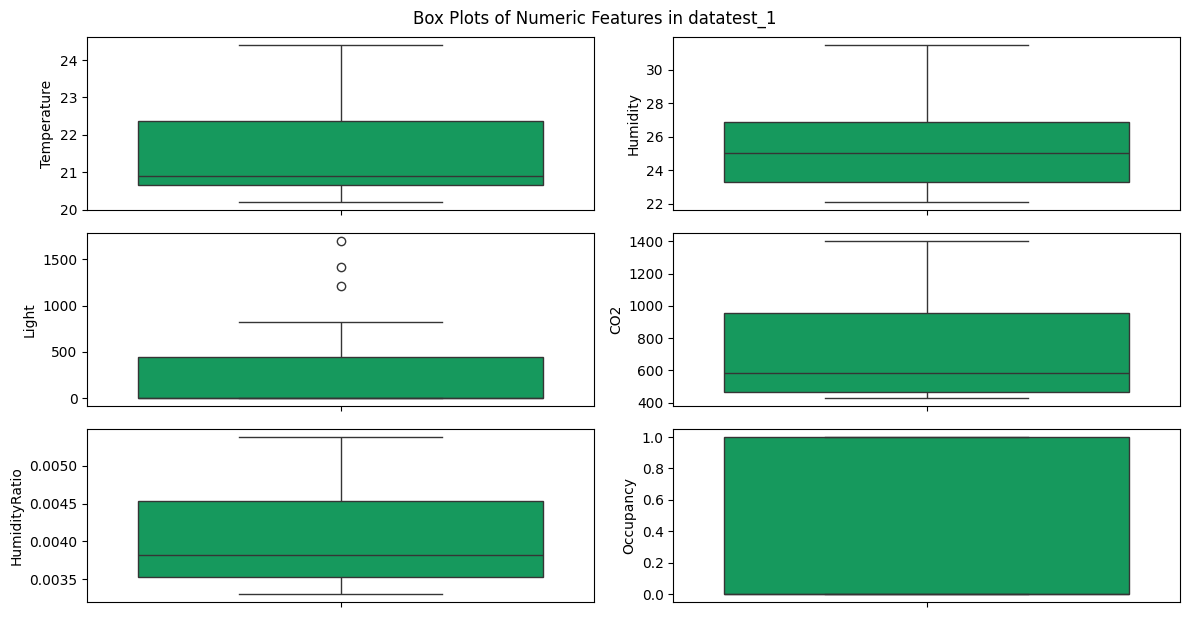

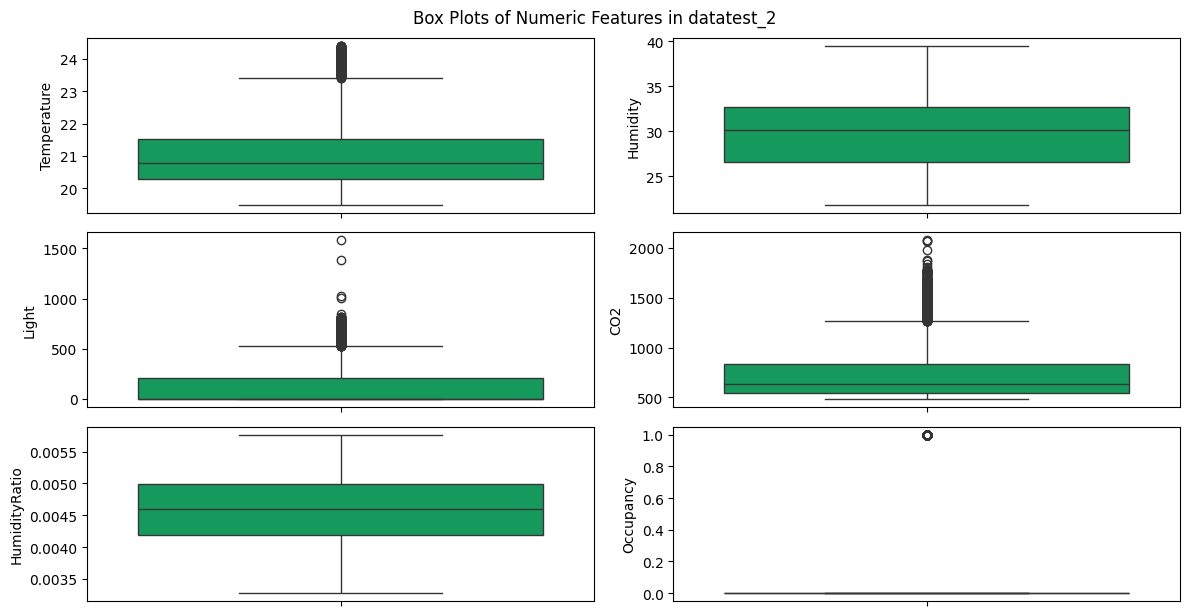

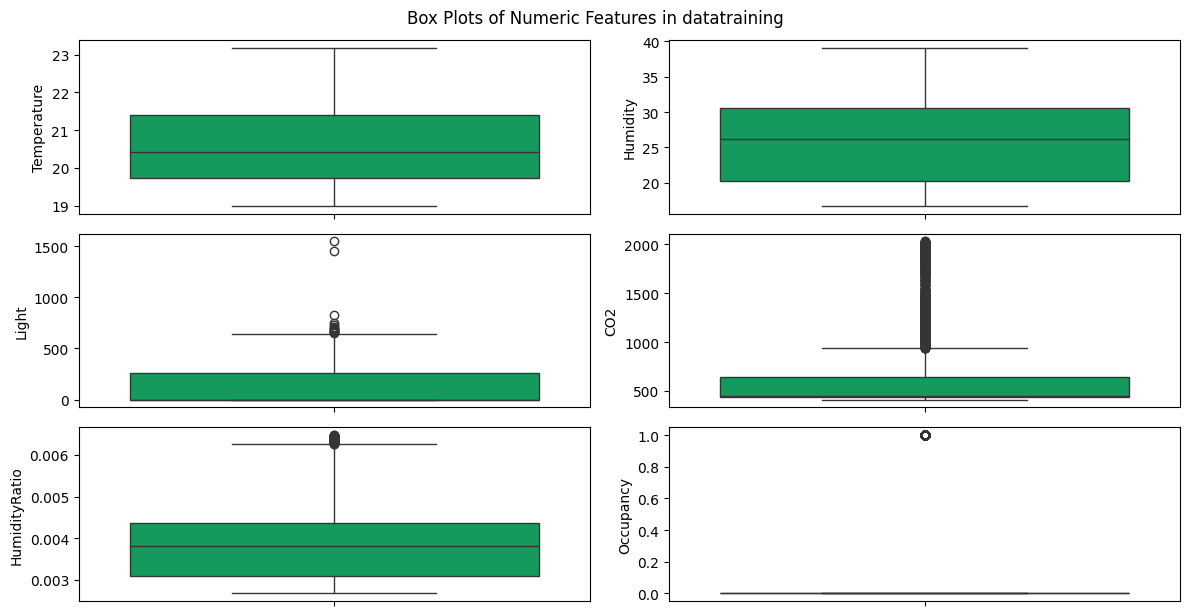

In [16]:
for name, df in datasets.items():
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    plt.figure(figsize=(12, 6))
    n = 3  # number of columns in subplot grid
    for i in range(0, len(numeric_cols)):
        plt.subplot(n, math.ceil(len(numeric_cols)/n), i+1)
        sns.boxplot(y=df[numeric_cols[i]], color='#00af5f', orient='v')
        plt.tight_layout()
    plt.suptitle(f'Box Plots of Numeric Features in {name}', y=1.02)
    plt.show()

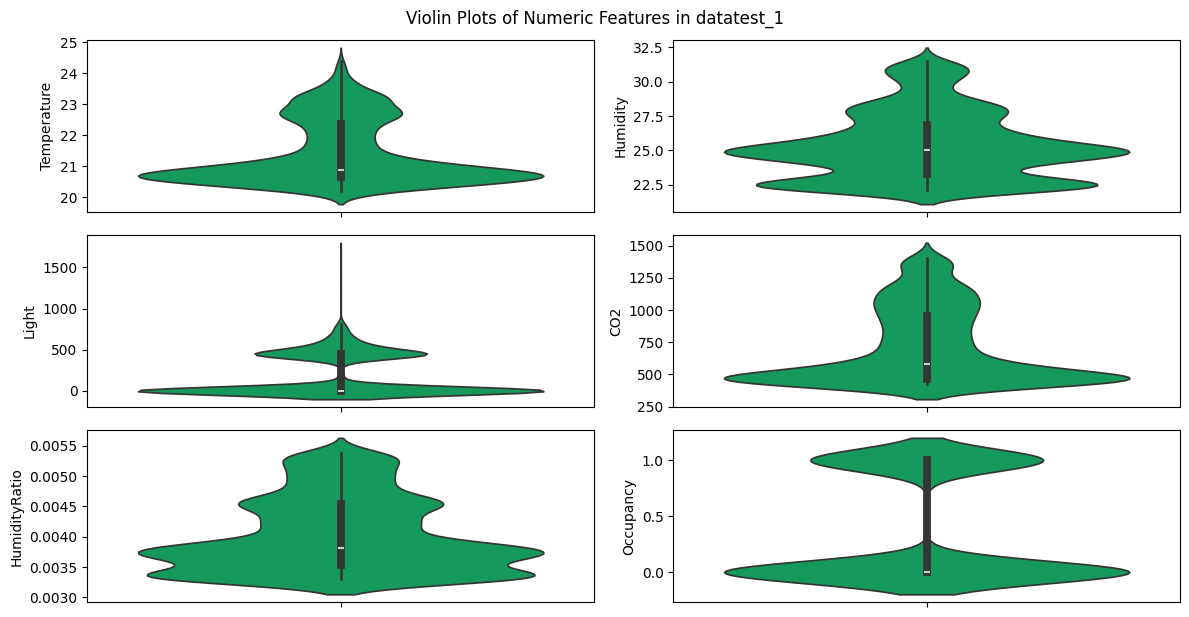

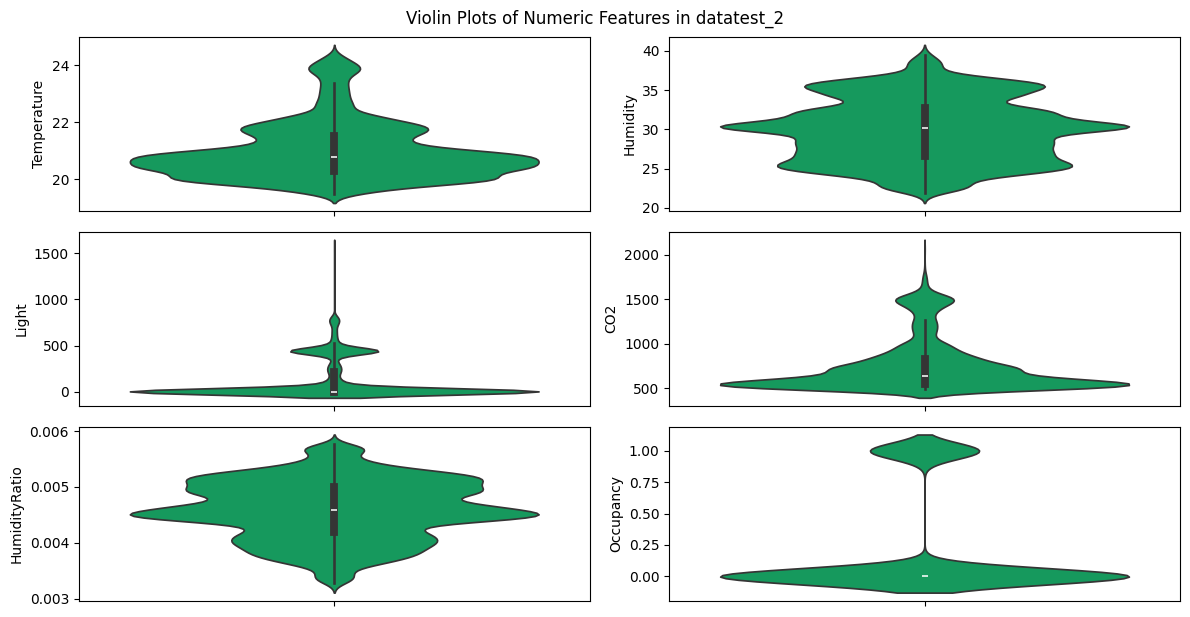

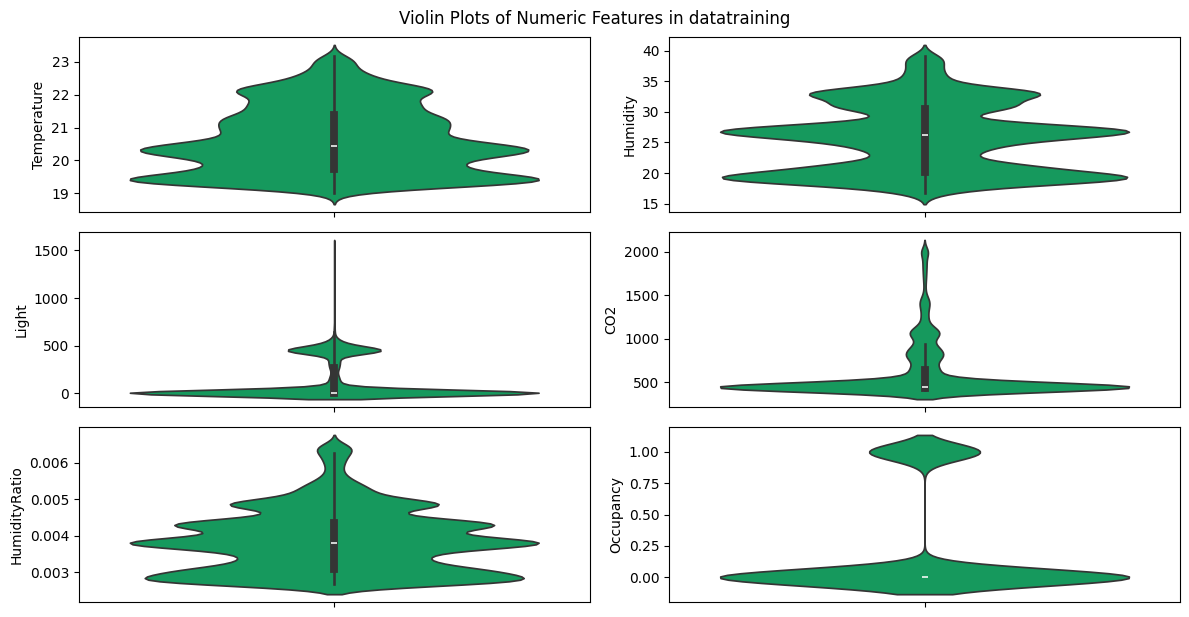

In [17]:
for name, df in datasets.items():
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    plt.figure(figsize=(12, 6))
    n = 3  # number of columns in subplot grid
    for i in range(0, len(numeric_cols)):
        plt.subplot(n, math.ceil(len(numeric_cols)/n), i+1)
        sns.violinplot(y=df[numeric_cols[i]], color='#00af5f', orient='v')
        plt.tight_layout()
    plt.suptitle(f'Violin Plots of Numeric Features in {name}', y=1.02)
    plt.show()